In [10]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

Stock name: NWL
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


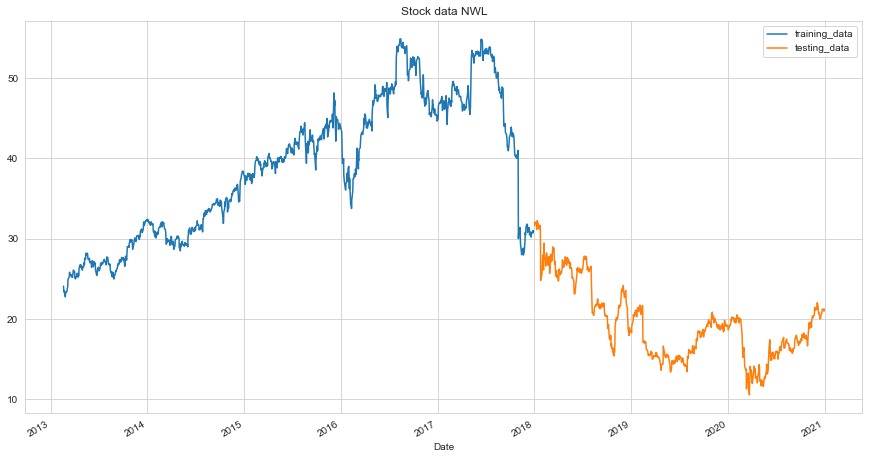

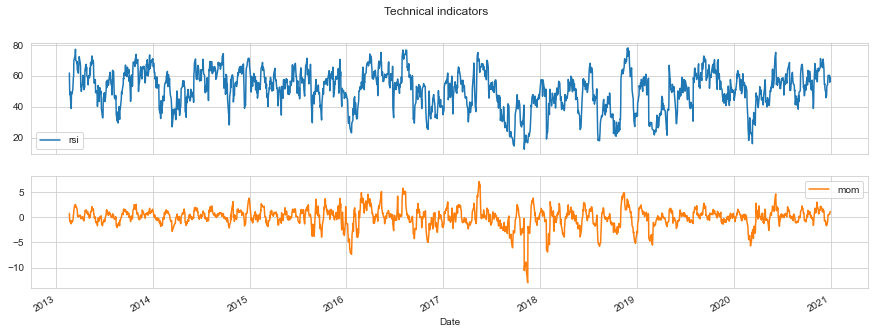

In [11]:
stock_name = 'nwl'.upper()
industry = 'Consumer defensive'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [12]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1269.68, duration: 0:00:00.207044
episode: 2/2000, episode end value: 1243.86, duration: 0:00:00.207046
episode: 3/2000, episode end value: 1260.79, duration: 0:00:00.206046
episode: 4/2000, episode end value: 1265.90, duration: 0:00:00.217034
episode: 5/2000, episode end value: 1262.67, duration: 0:00:00.210050
episode: 6/2000, episode end value: 1278.19, duration: 0:00:00.208045
episode: 7/2000, episode end value: 1236.76, duration: 0:00:00.197045
episode: 8/2000, episode end value: 1300.45, duration: 0:00:00.223049
episode: 9/2000, episode end value: 1243.84, duration: 0:00:00.208045
episode: 10/2000, episode end value: 1287.53, duration: 0:00:00.205060
episode: 11/2000, episode end value: 1367.87, duration: 0:00:00.192043
episode: 12/2000, episode end value: 1306.78, duration: 0:00:00.200046
episode: 13/2000, episode end value: 1331.76, duration: 0:00:00.189059
episode: 14/2000, episode end value: 1255.94, duration: 0:00:00.219059
episode: 15/200

episode: 117/2000, episode end value: 1212.27, duration: 0:00:00.222048
episode: 118/2000, episode end value: 1253.59, duration: 0:00:00.201031
episode: 119/2000, episode end value: 1282.90, duration: 0:00:00.211060
episode: 120/2000, episode end value: 1419.79, duration: 0:00:00.207047
episode: 121/2000, episode end value: 1395.64, duration: 0:00:00.198058
episode: 122/2000, episode end value: 1234.02, duration: 0:00:00.192029
episode: 123/2000, episode end value: 1219.53, duration: 0:00:00.201046
episode: 124/2000, episode end value: 1281.23, duration: 0:00:00.217050
episode: 125/2000, episode end value: 1333.05, duration: 0:00:00.208045
episode: 126/2000, episode end value: 1202.81, duration: 0:00:00.211047
episode: 127/2000, episode end value: 1366.39, duration: 0:00:00.209056
episode: 128/2000, episode end value: 1205.70, duration: 0:00:00.201047
episode: 129/2000, episode end value: 1239.15, duration: 0:00:00.217049
episode: 130/2000, episode end value: 1361.47, duration: 0:00:00

episode: 232/2000, episode end value: 1348.45, duration: 0:00:00.209066
episode: 233/2000, episode end value: 1336.90, duration: 0:00:00.210029
episode: 234/2000, episode end value: 1319.76, duration: 0:00:00.211047
episode: 235/2000, episode end value: 1336.11, duration: 0:00:00.212040
episode: 236/2000, episode end value: 1265.66, duration: 0:00:00.205051
episode: 237/2000, episode end value: 1224.99, duration: 0:00:00.216050
episode: 238/2000, episode end value: 1279.53, duration: 0:00:00.207031
episode: 239/2000, episode end value: 1320.74, duration: 0:00:00.223050
episode: 240/2000, episode end value: 1316.82, duration: 0:00:00.204058
episode: 241/2000, episode end value: 1262.26, duration: 0:00:00.219051
episode: 242/2000, episode end value: 1219.80, duration: 0:00:00.205047
episode: 243/2000, episode end value: 1325.52, duration: 0:00:00.223042
episode: 244/2000, episode end value: 1241.54, duration: 0:00:00.221051
episode: 245/2000, episode end value: 1303.78, duration: 0:00:00

episode: 346/2000, episode end value: 1346.58, duration: 0:00:00.217033
episode: 347/2000, episode end value: 1322.90, duration: 0:00:00.216056
episode: 348/2000, episode end value: 1283.99, duration: 0:00:00.200047
episode: 349/2000, episode end value: 1266.02, duration: 0:00:00.204054
episode: 350/2000, episode end value: 1320.71, duration: 0:00:00.214045
episode: 351/2000, episode end value: 1252.38, duration: 0:00:00.209049
episode: 352/2000, episode end value: 1291.99, duration: 0:00:00.211048
episode: 353/2000, episode end value: 1333.12, duration: 0:00:00.219048
episode: 354/2000, episode end value: 1303.09, duration: 0:00:00.209047
episode: 355/2000, episode end value: 1286.13, duration: 0:00:00.212047
episode: 356/2000, episode end value: 1327.45, duration: 0:00:00.218047
episode: 357/2000, episode end value: 1250.45, duration: 0:00:00.216058
episode: 358/2000, episode end value: 1301.14, duration: 0:00:00.225054
episode: 359/2000, episode end value: 1221.67, duration: 0:00:00

episode: 460/2000, episode end value: 1314.12, duration: 0:00:00.202030
episode: 461/2000, episode end value: 1309.21, duration: 0:00:00.203045
episode: 462/2000, episode end value: 1277.19, duration: 0:00:00.210063
episode: 463/2000, episode end value: 1273.32, duration: 0:00:00.208044
episode: 464/2000, episode end value: 1309.35, duration: 0:00:00.211035
episode: 465/2000, episode end value: 1329.17, duration: 0:00:00.206045
episode: 466/2000, episode end value: 1298.78, duration: 0:00:00.194044
episode: 467/2000, episode end value: 1355.11, duration: 0:00:00.207046
episode: 468/2000, episode end value: 1282.93, duration: 0:00:00.214045
episode: 469/2000, episode end value: 1226.38, duration: 0:00:00.201047
episode: 470/2000, episode end value: 1324.89, duration: 0:00:00.199042
episode: 471/2000, episode end value: 1330.11, duration: 0:00:00.219050
episode: 472/2000, episode end value: 1234.01, duration: 0:00:00.202048
episode: 473/2000, episode end value: 1310.35, duration: 0:00:00

episode: 575/2000, episode end value: 1279.08, duration: 0:00:00.211033
episode: 576/2000, episode end value: 1307.05, duration: 0:00:00.217048
episode: 577/2000, episode end value: 1308.43, duration: 0:00:00.232051
episode: 578/2000, episode end value: 1314.70, duration: 0:00:00.352081
episode: 579/2000, episode end value: 1298.10, duration: 0:00:00.382082
episode: 580/2000, episode end value: 1277.81, duration: 0:00:00.345078
episode: 581/2000, episode end value: 1307.51, duration: 0:00:00.280064
episode: 582/2000, episode end value: 1309.13, duration: 0:00:00.266058
episode: 583/2000, episode end value: 1265.63, duration: 0:00:00.219051
episode: 584/2000, episode end value: 1241.07, duration: 0:00:00.195041
episode: 585/2000, episode end value: 1265.02, duration: 0:00:00.200060
episode: 586/2000, episode end value: 1277.48, duration: 0:00:00.212033
episode: 587/2000, episode end value: 1266.67, duration: 0:00:00.217046
episode: 588/2000, episode end value: 1307.13, duration: 0:00:00

episode: 689/2000, episode end value: 1312.88, duration: 0:00:00.205044
episode: 690/2000, episode end value: 1299.49, duration: 0:00:00.194043
episode: 691/2000, episode end value: 1302.63, duration: 0:00:00.201044
episode: 692/2000, episode end value: 1253.19, duration: 0:00:00.200060
episode: 693/2000, episode end value: 1254.13, duration: 0:00:00.214049
episode: 694/2000, episode end value: 1255.71, duration: 0:00:00.212047
episode: 695/2000, episode end value: 1264.20, duration: 0:00:00.201030
episode: 696/2000, episode end value: 1191.14, duration: 0:00:00.205046
episode: 697/2000, episode end value: 1262.83, duration: 0:00:00.217047
episode: 698/2000, episode end value: 1260.35, duration: 0:00:00.198045
episode: 699/2000, episode end value: 1218.13, duration: 0:00:00.190043
episode: 700/2000, episode end value: 1286.55, duration: 0:00:00.193059
episode: 701/2000, episode end value: 1305.19, duration: 0:00:00.198029
episode: 702/2000, episode end value: 1287.46, duration: 0:00:00

episode: 804/2000, episode end value: 1419.37, duration: 0:00:00.212032
episode: 805/2000, episode end value: 1399.35, duration: 0:00:00.204046
episode: 806/2000, episode end value: 1208.65, duration: 0:00:00.198043
episode: 807/2000, episode end value: 1262.09, duration: 0:00:00.194041
episode: 808/2000, episode end value: 1482.08, duration: 0:00:00.205046
episode: 809/2000, episode end value: 1290.29, duration: 0:00:00.202047
episode: 810/2000, episode end value: 1301.31, duration: 0:00:00.207059
episode: 811/2000, episode end value: 1200.36, duration: 0:00:00.205047
episode: 812/2000, episode end value: 1240.95, duration: 0:00:00.215033
episode: 813/2000, episode end value: 1241.66, duration: 0:00:00.204044
episode: 814/2000, episode end value: 1330.87, duration: 0:00:00.214048
episode: 815/2000, episode end value: 1339.98, duration: 0:00:00.218040
episode: 816/2000, episode end value: 1300.21, duration: 0:00:00.212048
episode: 817/2000, episode end value: 1328.24, duration: 0:00:00

episode: 918/2000, episode end value: 1218.89, duration: 0:00:00.206045
episode: 919/2000, episode end value: 1209.03, duration: 0:00:00.201047
episode: 920/2000, episode end value: 1311.46, duration: 0:00:00.199044
episode: 921/2000, episode end value: 1312.84, duration: 0:00:00.198028
episode: 922/2000, episode end value: 1433.65, duration: 0:00:00.210048
episode: 923/2000, episode end value: 1309.64, duration: 0:00:00.213047
episode: 924/2000, episode end value: 1342.03, duration: 0:00:00.224052
episode: 925/2000, episode end value: 1319.80, duration: 0:00:00.216057
episode: 926/2000, episode end value: 1300.47, duration: 0:00:00.193050
episode: 927/2000, episode end value: 1253.32, duration: 0:00:00.195031
episode: 928/2000, episode end value: 1320.17, duration: 0:00:00.197059
episode: 929/2000, episode end value: 1257.30, duration: 0:00:00.207032
episode: 930/2000, episode end value: 1335.56, duration: 0:00:00.208045
episode: 931/2000, episode end value: 1362.11, duration: 0:00:00

episode: 1033/2000, episode end value: 1315.67, duration: 0:00:00.204045
episode: 1034/2000, episode end value: 1285.42, duration: 0:00:00.206035
episode: 1035/2000, episode end value: 1290.79, duration: 0:00:00.206042
episode: 1036/2000, episode end value: 1267.17, duration: 0:00:00.214051
episode: 1037/2000, episode end value: 1256.96, duration: 0:00:00.203060
episode: 1038/2000, episode end value: 1278.53, duration: 0:00:00.228051
episode: 1039/2000, episode end value: 1276.45, duration: 0:00:00.201028
episode: 1040/2000, episode end value: 1339.25, duration: 0:00:00.205047
episode: 1041/2000, episode end value: 1291.46, duration: 0:00:00.199055
episode: 1042/2000, episode end value: 1248.34, duration: 0:00:00.207038
episode: 1043/2000, episode end value: 1230.75, duration: 0:00:00.222049
episode: 1044/2000, episode end value: 1330.74, duration: 0:00:00.208047
episode: 1045/2000, episode end value: 1261.38, duration: 0:00:00.216065
episode: 1046/2000, episode end value: 1230.62, dur

episode: 1146/2000, episode end value: 1244.38, duration: 0:00:00.211048
episode: 1147/2000, episode end value: 1205.02, duration: 0:00:00.205044
episode: 1148/2000, episode end value: 1265.63, duration: 0:00:00.206046
episode: 1149/2000, episode end value: 1317.49, duration: 0:00:00.212048
episode: 1150/2000, episode end value: 1300.02, duration: 0:00:00.202060
episode: 1151/2000, episode end value: 1330.41, duration: 0:00:00.195027
episode: 1152/2000, episode end value: 1440.04, duration: 0:00:00.195043
episode: 1153/2000, episode end value: 1300.03, duration: 0:00:00.201064
episode: 1154/2000, episode end value: 1287.72, duration: 0:00:00.202028
episode: 1155/2000, episode end value: 1355.26, duration: 0:00:00.183041
episode: 1156/2000, episode end value: 1213.89, duration: 0:00:00.204044
episode: 1157/2000, episode end value: 1299.39, duration: 0:00:00.196046
episode: 1158/2000, episode end value: 1240.76, duration: 0:00:00.211046
episode: 1159/2000, episode end value: 1264.84, dur

episode: 1259/2000, episode end value: 1322.56, duration: 0:00:00.218048
episode: 1260/2000, episode end value: 1235.87, duration: 0:00:00.201060
episode: 1261/2000, episode end value: 1261.94, duration: 0:00:00.212032
episode: 1262/2000, episode end value: 1248.63, duration: 0:00:00.214050
episode: 1263/2000, episode end value: 1379.18, duration: 0:00:00.224048
episode: 1264/2000, episode end value: 1254.40, duration: 0:00:00.220050
episode: 1265/2000, episode end value: 1289.01, duration: 0:00:00.222048
episode: 1266/2000, episode end value: 1207.48, duration: 0:00:00.201047
episode: 1267/2000, episode end value: 1266.17, duration: 0:00:00.203044
episode: 1268/2000, episode end value: 1256.72, duration: 0:00:00.214049
episode: 1269/2000, episode end value: 1360.55, duration: 0:00:00.198045
episode: 1270/2000, episode end value: 1264.10, duration: 0:00:00.196043
episode: 1271/2000, episode end value: 1257.44, duration: 0:00:00.217049
episode: 1272/2000, episode end value: 1278.68, dur

episode: 1372/2000, episode end value: 1279.83, duration: 0:00:00.209045
episode: 1373/2000, episode end value: 1280.22, duration: 0:00:00.204028
episode: 1374/2000, episode end value: 1320.63, duration: 0:00:00.211062
episode: 1375/2000, episode end value: 1281.89, duration: 0:00:00.195034
episode: 1376/2000, episode end value: 1254.44, duration: 0:00:00.196040
episode: 1377/2000, episode end value: 1343.32, duration: 0:00:00.200045
episode: 1378/2000, episode end value: 1325.98, duration: 0:00:00.198043
episode: 1379/2000, episode end value: 1244.93, duration: 0:00:00.206063
episode: 1380/2000, episode end value: 1383.89, duration: 0:00:00.231063
episode: 1381/2000, episode end value: 1352.05, duration: 0:00:00.200032
episode: 1382/2000, episode end value: 1315.60, duration: 0:00:00.204045
episode: 1383/2000, episode end value: 1234.44, duration: 0:00:00.204055
episode: 1384/2000, episode end value: 1358.64, duration: 0:00:00.208040
episode: 1385/2000, episode end value: 1165.91, dur

episode: 1485/2000, episode end value: 1283.10, duration: 0:00:00.284066
episode: 1486/2000, episode end value: 1344.60, duration: 0:00:00.253056
episode: 1487/2000, episode end value: 1256.97, duration: 0:00:00.215038
episode: 1488/2000, episode end value: 1312.86, duration: 0:00:00.212057
episode: 1489/2000, episode end value: 1310.90, duration: 0:00:00.210056
episode: 1490/2000, episode end value: 1283.27, duration: 0:00:00.211044
episode: 1491/2000, episode end value: 1291.33, duration: 0:00:00.225042
episode: 1492/2000, episode end value: 1347.80, duration: 0:00:00.216063
episode: 1493/2000, episode end value: 1325.83, duration: 0:00:00.220056
episode: 1494/2000, episode end value: 1288.58, duration: 0:00:00.217032
episode: 1495/2000, episode end value: 1271.35, duration: 0:00:00.208048
episode: 1496/2000, episode end value: 1229.30, duration: 0:00:00.223051
episode: 1497/2000, episode end value: 1295.25, duration: 0:00:00.220050
episode: 1498/2000, episode end value: 1231.79, dur

episode: 1598/2000, episode end value: 1276.24, duration: 0:00:00.211048
episode: 1599/2000, episode end value: 1272.01, duration: 0:00:00.233052
episode: 1600/2000, episode end value: 1203.39, duration: 0:00:00.207063
episode: 1601/2000, episode end value: 1319.72, duration: 0:00:00.225034
episode: 1602/2000, episode end value: 1331.28, duration: 0:00:00.216050
episode: 1603/2000, episode end value: 1231.82, duration: 0:00:00.190044
episode: 1604/2000, episode end value: 1245.57, duration: 0:00:00.215047
episode: 1605/2000, episode end value: 1255.68, duration: 0:00:00.209046
episode: 1606/2000, episode end value: 1293.75, duration: 0:00:00.201038
episode: 1607/2000, episode end value: 1287.50, duration: 0:00:00.209047
episode: 1608/2000, episode end value: 1228.70, duration: 0:00:00.210047
episode: 1609/2000, episode end value: 1328.16, duration: 0:00:00.202045
episode: 1610/2000, episode end value: 1295.90, duration: 0:00:00.217048
episode: 1611/2000, episode end value: 1395.20, dur

episode: 1711/2000, episode end value: 1233.16, duration: 0:00:00.226053
episode: 1712/2000, episode end value: 1308.83, duration: 0:00:00.214046
episode: 1713/2000, episode end value: 1248.41, duration: 0:00:00.213038
episode: 1714/2000, episode end value: 1280.53, duration: 0:00:00.202045
episode: 1715/2000, episode end value: 1366.20, duration: 0:00:00.207046
episode: 1716/2000, episode end value: 1215.70, duration: 0:00:00.200048
episode: 1717/2000, episode end value: 1320.30, duration: 0:00:00.213061
episode: 1718/2000, episode end value: 1246.10, duration: 0:00:00.198030
episode: 1719/2000, episode end value: 1295.03, duration: 0:00:00.205045
episode: 1720/2000, episode end value: 1244.49, duration: 0:00:00.204060
episode: 1721/2000, episode end value: 1305.88, duration: 0:00:00.205046
episode: 1722/2000, episode end value: 1320.39, duration: 0:00:00.196044
episode: 1723/2000, episode end value: 1260.12, duration: 0:00:00.204031
episode: 1724/2000, episode end value: 1285.83, dur

episode: 1824/2000, episode end value: 1294.80, duration: 0:00:00.221063
episode: 1825/2000, episode end value: 1239.69, duration: 0:00:00.214046
episode: 1826/2000, episode end value: 1213.77, duration: 0:00:00.220037
episode: 1827/2000, episode end value: 1282.44, duration: 0:00:00.212044
episode: 1828/2000, episode end value: 1209.08, duration: 0:00:00.210064
episode: 1829/2000, episode end value: 1334.78, duration: 0:00:00.224034
episode: 1830/2000, episode end value: 1334.23, duration: 0:00:00.213058
episode: 1831/2000, episode end value: 1294.59, duration: 0:00:00.206053
episode: 1832/2000, episode end value: 1216.11, duration: 0:00:00.208028
episode: 1833/2000, episode end value: 1467.39, duration: 0:00:00.202045
episode: 1834/2000, episode end value: 1238.83, duration: 0:00:00.206045
episode: 1835/2000, episode end value: 1245.34, duration: 0:00:00.203067
episode: 1836/2000, episode end value: 1302.71, duration: 0:00:00.194024
episode: 1837/2000, episode end value: 1437.02, dur

episode: 1938/2000, episode end value: 1345.11, duration: 0:00:00.215036
episode: 1939/2000, episode end value: 1259.30, duration: 0:00:00.253063
episode: 1940/2000, episode end value: 1355.18, duration: 0:00:00.239044
episode: 1941/2000, episode end value: 1270.50, duration: 0:00:00.250056
episode: 1942/2000, episode end value: 1262.18, duration: 0:00:00.242054
episode: 1943/2000, episode end value: 1284.57, duration: 0:00:00.243057
episode: 1944/2000, episode end value: 1289.13, duration: 0:00:00.233050
episode: 1945/2000, episode end value: 1353.69, duration: 0:00:00.223049
episode: 1946/2000, episode end value: 1288.86, duration: 0:00:00.221052
episode: 1947/2000, episode end value: 1398.98, duration: 0:00:00.223050
episode: 1948/2000, episode end value: 1381.63, duration: 0:00:00.214045
episode: 1949/2000, episode end value: 1266.17, duration: 0:00:00.235053
episode: 1950/2000, episode end value: 1392.18, duration: 0:00:00.218050
episode: 1951/2000, episode end value: 1263.55, dur

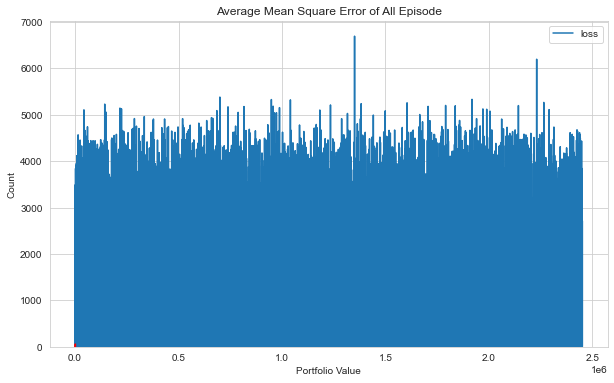

In [13]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

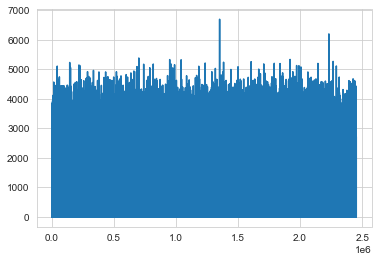

In [14]:
plt.plot(agent.model.losses)

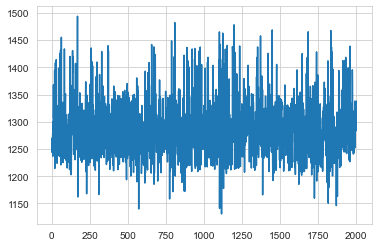

In [15]:
plt.plot(portfolio_value)

episode end value: 1122.62, duration: 0:00:00.095021
Sell: 221 times, Buy: 235 times


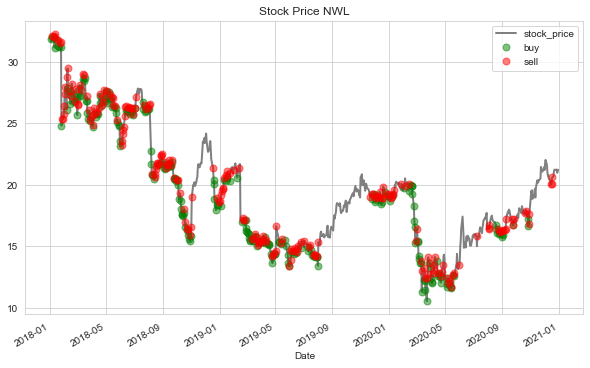

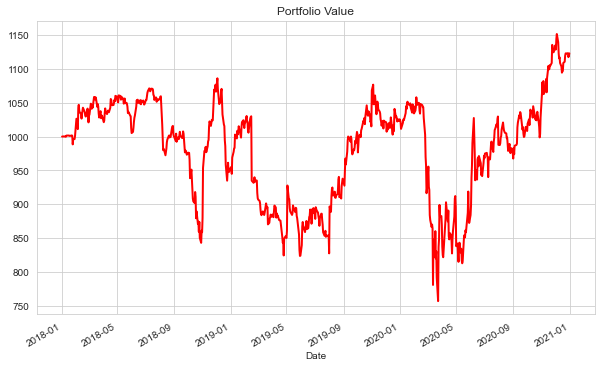

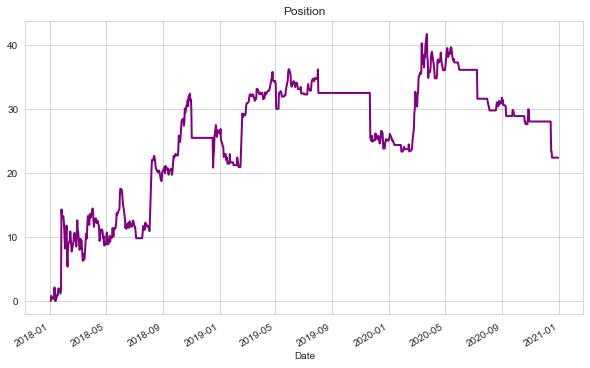

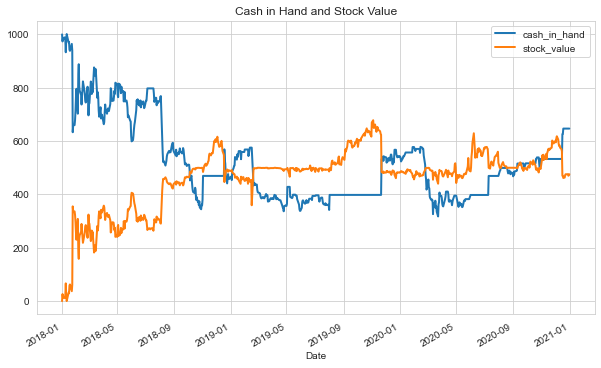

In [16]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [17]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: NWL
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 3.93 %
Volatility: 0.2486
shape ratio: 0.1139
Maximun drawdown: -30.24 %
Calmar ratio: 0.1300
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): -12.45 %
Volatility (benchmark): 0.4957
shape ratio: -0.2734
Maximun drawdown: -67.30 %
Calmar ratio (benchmark): -0.1851


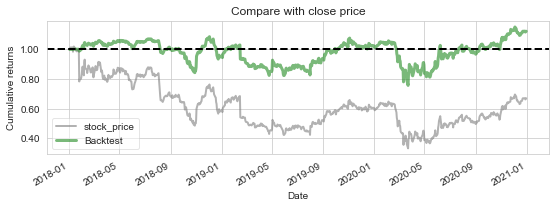

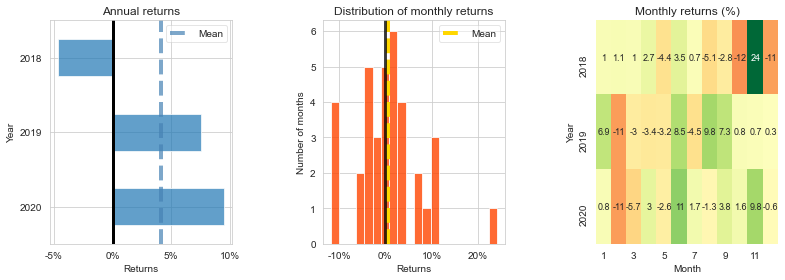

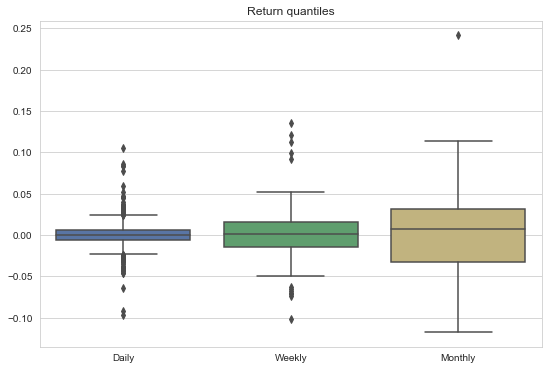

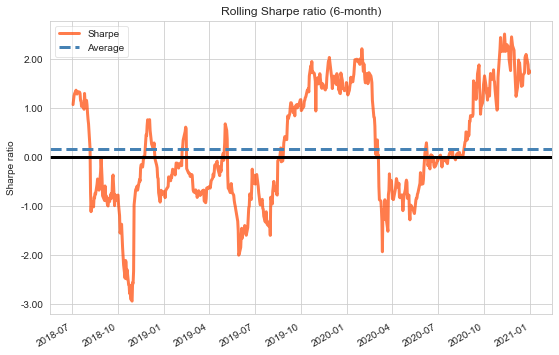

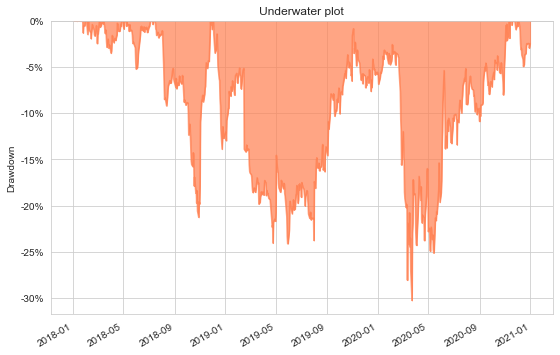

In [18]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')